In [66]:
## From neural networks

In [91]:
import tensorflow as tf
# from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [3]:
### MNIST Fashion Dataset

In [46]:
fashion_mnist = tf.keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [10]:
print(f"The shape of train dataset: {train_images.shape}")

The shape of train dataset: (60000, 28, 28)


In [17]:
print(f"Total images of train dataset: {train_images.shape[0]}")
print(f"Shape of images: {train_images.shape[1:]}")

Total images of train dataset: 60000
Shape of images: (28, 28)


In [25]:
train_images[0,24,24] # let's have a look at one pixel

99

In [27]:
train_labels[:15] # First 15 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7], dtype=uint8)

In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [43]:
train_images[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

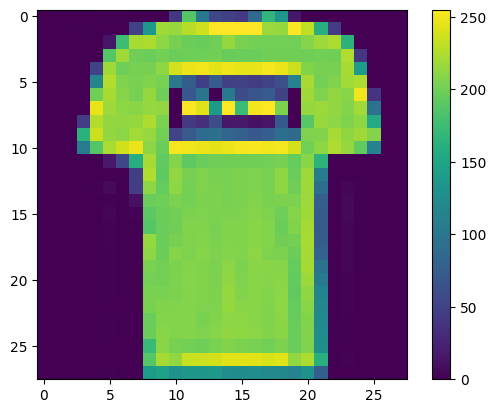

In [44]:
# Making image fom the given arrays
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [47]:
train_images = train_images / 255.0

test_images = test_images / 255.0

### Building the model

In [53]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Sequential

In [56]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # input layer (1)
    Dense(units=128, activation='relu'),  # hidden layer (2)
    Dense(units=10, activation='softmax') # output layer (3)
])

### Compile the model

In [57]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [58]:
model.fit(train_images, train_labels, epochs=25)  

Epoch 1/25
1875/1875 [==============================] - 17s 8ms/step - loss: 0.5000 - accuracy: 0.8267
Epoch 2/25
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3778 - accuracy: 0.8642
Epoch 3/25
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3378 - accuracy: 0.8765
Epoch 4/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3119 - accuracy: 0.8864
Epoch 5/25
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2955 - accuracy: 0.8915
Epoch 6/25
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2811 - accuracy: 0.8973
Epoch 7/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2693 - accuracy: 0.8994
Epoch 8/25
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2582 - accuracy: 0.9045
Epoch 9/25
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2474 - accuracy: 0.9078
Epoch 10/25
1875/1875 [==============================] - 15s 8ms/step - 

### Evaluation of the model

In [59]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.3876 - accuracy: 0.8845
Test accuracy: 0.8845000267028809


### Making predictions

In [60]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 4ms/step


In [61]:
predictions[0] # Prediction of the first image

array([1.6711219e-12, 2.4274105e-18, 3.2491800e-12, 4.8568629e-21,
       5.1185896e-14, 2.9832797e-06, 2.9352046e-12, 3.5224678e-06,
       5.9656552e-16, 9.9999344e-01], dtype=float32)

In [65]:
print(f"Predicted class: {np.argmax(predictions[0])} \nActual class {test_labels[0]}") 

Predicted class: 9 
Actual class 9


In [121]:
def test_predict(index):
    index=int(index)
    image=test_images[index]
    pred=model.predict(np.array([image]))
    np.argmax(pred)
    predicted_class=class_names[np.argmax(pred)]
    clear_output()
    print(f"Predicted Class: {predicted_class}")
    print(f"Actual Class: {class_names[test_labels[index]]}")
    plt.imshow(test_images[index])
    plt.show()

Predicted Class: Shirt
Actual Class: Shirt


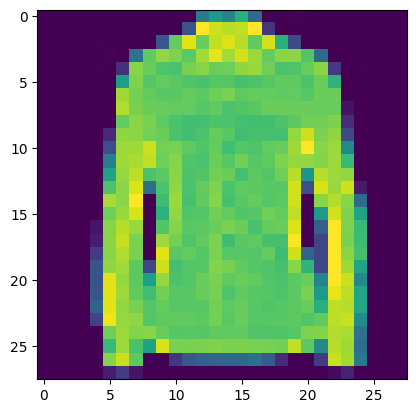

In [122]:
test_predict(26)

End